## Eric Maxwell
## CSC 570 Data Science
## Advanced Validation
<hr style="height:5px">

### Import Functions

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
import math

%pylab inline

C:\Users\eek00\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\eek00\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Populating the interactive namespace from numpy and matplotlib


<hr style="height:3px">
### Import Breast Cancer data set

In [2]:
X = pd.read_csv("breast_cancer.csv")

In [3]:
#View data frame shape
X.shape

(699, 12)

In [4]:
#View data frame 
X

,Unnamed: 0,id number,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
0,0,1000025,5,1,1,1,2,1,3,1,1,0
1,1,1002945,5,4,4,5,7,10,3,2,1,0
2,2,1015425,3,1,1,1,2,2,3,1,1,0
3,3,1016277,6,8,8,1,3,4,3,7,1,0
4,4,1017023,4,1,1,3,2,1,3,1,1,0
5,5,1017122,8,10,10,8,7,10,9,7,1,1
6,6,1018099,1,1,1,1,2,10,3,1,1,0
7,7,1018561,2,1,2,1,2,1,3,1,1,0
8,8,1033078,2,1,1,1,2,1,1,1,5,0
9,9,1033078,4,2,1,1,2,1,2,1,1,0


<hr style="height:3px">
### Data Prep

In [5]:
#Drop unnecessary variables
X.drop(['Unnamed: 0','id number'], axis=1, inplace=True)

In [6]:
#Veiw stats of data set
X.describe()

,clump_thickness,uniformity_of_cell_size,uniformity_of_cell_shape,marginal_adhesion,epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,malignant
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.440629,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.665507,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [7]:
#Create dependent variable
y = X.pop('malignant')

In [8]:
#Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

<hr style="height:3px">
### Create Random Forest Classifier

In [9]:
#Create classifier
rfc = RandomForestClassifier(n_jobs=1)

In [10]:
#View classifier hyper parameters
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [11]:
#Create GridSearchCV
bootstrap = [True,False]
criterion = ['gini', 'entropy']
max_depth = [20, 35, 50, None]
min_samples_leaf= [1,2,3,4,5]
n_estimators = [100,300,400,500,1000]
max_features = ['auto', 'sqrt','log2']
min_samples_split = [2,3,5,7]

estimator = GridSearchCV(rfc,
                         dict(bootstrap=bootstrap,
                              criterion=criterion,
                              max_depth=max_depth,
                              min_samples_leaf=min_samples_leaf,
                              n_estimators=n_estimators,
                              max_features=max_features,
                              min_samples_split=min_samples_split
                              ), cv=None, n_jobs=-1)

In [12]:
#Tune hyper parameters with the GridSearchCV object.
estimator.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'bootstrap': [True, False], 'criterion': ['gini', 'entropy'], 'max_depth': [20, 35, 50, None], 'min_samples_leaf': [1, 2, 3, 4, 5], 'n_estimators': [100, 300, 400, 500, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'min_samples_split': [2, 3, 5, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [13]:
#View best model
estimator.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=4,
            min_samples_split=3, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [14]:
#Rename best model for future use
best_rfc = estimator.best_estimator_

<hr style="height:3px">
### Test and view holdout model performance

In [38]:
#Get model AUC score on test data
auc = roc_auc_score(y_test, best_rfc.predict_proba(X_test)[:,1])
print ("AUC Score: ", auc)

AUC Score:  0.996725146199


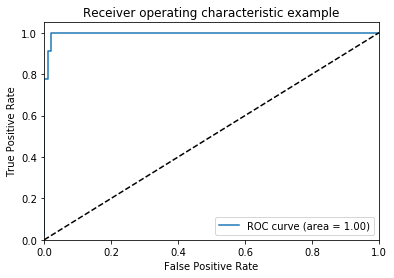

In [16]:
# Plot of the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_rfc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [17]:
#Get model accuracy for test set
accuracy = accuracy_score(y_test, best_rfc.predict(X_test))
print ("Accuracy: ", accuracy)

Accuracy:  0.971428571429


In [21]:
#View classification report, which includes precision and recall
print (classification_report(y_test, best_rfc.predict(X_test)))

             precision    recall  f1-score   support

          0       0.98      0.98      0.98        95
          1       0.96      0.96      0.96        45

avg / total       0.97      0.97      0.97       140



In [22]:
#View confustion matrix
print (confusion_matrix(y_test, best_rfc.predict(X_test)))

[[93  2]
 [ 2 43]]


In [37]:
#Summerize model performance on test set
print ("AUC Score: ", auc)
print ("Accuracy: ", round(accuracy,3)*100)
print("Precision: .96,  Recall: .96")

AUC Score:  0.996725146199
Accuracy:  97.1
Precision: .96,  Recall: .96


#### Report on model performance

The final holdout model had 93 true negatives, 43 true positives, 2 false positives and 2 false negatives. The accuracy was 97.1% with 136 of the 140 instances correctly classified. 

The precision was 96%. This is the true positives divided by the sum of the true positives and false positives (tp/(tp+fp)). There were 43 true positives and 2 false positives. This gives us a precision of 43/45 or 96%. This is a measure of the purity our positive predictions. 

The recall was also 96%. This is the true positives divided by the sum of the true positives and false negatives (tp/(tp+fn)). There were 43 true positives and 2 false negatives. This gives us a recall of 43/45 or 96%. This is a measure of how many of the total positives were predicted correctly. 

Although precision and recall are the same here, this is not typically the case. We happen to have the same number of false positives and false negatives in for this model. 

The ROC AUC score is 0.997. This is a score that represents the ability of the model to reduce false positives and maximize true positives. This can be a better way to score a model. Particularly when the model has an imbalance in classes. The score of .997 is a good score considering that the maximum possible score with 100% true positives and 0% false positives is 1.0. 

<hr style="height:3px">
### 10 Fold Cross Validation

In [23]:
#Get 10 fold cross-validation accuracy and AUC scores
from sklearn import cross_validation
accuracy_scores = cross_validation.cross_val_score(best_rfc, X, y, cv=10)
auc_scores = cross_validation.cross_val_score(best_rfc, X, y, cv=10, scoring='roc_auc')

In [41]:
#View mean accuracy and AUC scores for the 10 fold cross-validation process
print("Mean Accuracy:",accuracy_scores.mean())
print("Mean AUC score:",auc_scores.mean())

Mean Accuracy: 0.965773481469
Mean AUC score: 0.992490740741


#### 95% Confidence Interval

In [27]:
#Get mean accuracy, standard deviation and confidence interval
mean_score = accuracy_scores.mean()
std_dev = accuracy_scores.std()
std_error = accuracy_scores.std() / math.sqrt(accuracy_scores.shape[0])
ci =  2.262 * std_error
lower_bound = mean_score - ci
upper_bound = mean_score + ci

print ("Score is %f +/-  %f" % (mean_score, ci))
print ('95 percent probability that the average score will be between %f and %f' % (lower_bound, upper_bound))

Score is 0.965773 +/-  0.017704
95 percent probability that the average score will be between 0.948069 and 0.983478


#### Holdout AUC vs 10 Fold Cross Validation AUC

In [29]:
print("Holdout AUC:", auc)
print("10 Fold Cross Validation AUC:", auc_scores.mean())

Holdout AUC: 0.996725146199
10 Fold Cross Validation AUC: 0.992490740741


The AUC scores are comparable. However, the 10 fold cross-valadation score is the lower of the two. This is most likely due to the fact that the test set was used to tune the hyper parameters. Once the data is exposed to the model, and used to help improve it, the model becomes somewhat overfit to the test data. Cross validation is a good way to moniter if the has become overfit, or how overfit the model is to the test set. In this case, the data was split into ten parts and the model was trained and tested 10 seperate times. Each training used 9 of the parts or 90% of the data, and was tested on 1 of the parts or 10% of the data. The cross-validation score is a better estimate of future performance. Each observation has been tested which ensures that the all the data has been represented in the scores, which can help eliminate the case where the test set contains tricky or edge cases. Also, none of the test data was exposed during the model design.

Precision and Recall can't really be determined for the cross-validation because there are 10 different test being performed.

#### Holdout vs 10 Fold Cross Validation Accuracy

In [34]:
print("Holdout Accuracy:", round(accuracy,3)*100)
print("10 Fold Cross Validation Accuracy:", round(accuracy_scores.mean(),3)*100)

Holdout Accuracy: 97.1
10 Fold Cross Validation Accuracy: 96.6


The accuracy scores have the same trend as the AUC scores for the same reasons.